  <center><font color=BROWN>CAR PRICE PREDICTION

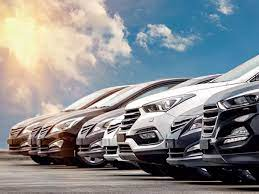

### <font color=orange> IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib as k
import warnings
warnings.filterwarnings('ignore')

### <font color=orange> LOADING THE DATASET 

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [3]:
data.tail()

car_ID  symboling          CarName fueltype aspiration doornumber  \
200     201         -1  volvo 145e (sw)      gas        std       four   
201     202         -1      volvo 144ea      gas      turbo       four   
202     203         -1      volvo 244dl      gas        std       four   
203     204         -1        volvo 246   diesel      turbo       four   
204     205         -1      volvo 264gl      gas      turbo       four   

    carbody drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
200   sedan        rwd          front      109.1  ...         141        mpfi   
201   sedan        rwd          front      109.1  ...         141        mpfi   
202   sedan        rwd          front      109.1  ...         173        mpfi   
203   sedan        rwd          front      109.1  ...         145         idi   
204   sedan        rwd          front      109.1  ...         141        mpfi   

     boreratio  stroke compressionratio horsepower  peakrpm citympg  \
200       3.78    3.15              9.5        114     5400      23   
201       3.78    3.15              8.7        160     5300      19   
202       3.58    2.87              8.8        134     5500      18   
203       3.01    3.40             23.0        106     4800      26   
204       3.78    3.15              9.5        114     5400      19   

     highwaympg    price  
200          28  16845.0  
201          25  19045.0  
202          23  21485.0  
203          27  22470.0  
204          25  22625.0  

[5 rows x 26 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.shape

(205, 26)

In [6]:
data.size

5330

In [7]:
data.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

### <font color=orange> CHECK THE NULL VALUES 

In [8]:
data.isnull().sum()*100

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### <font color=orange> CHECK DUPLICATED VALUES

In [9]:
data.duplicated().sum()

0

In [10]:
data

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## <center><font color =brown>UNIVARIATE ANALYSIS

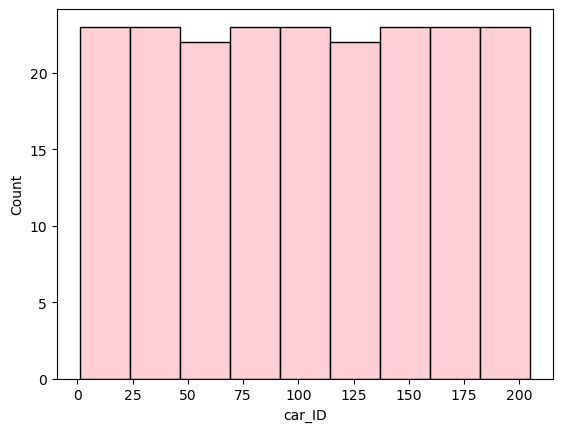

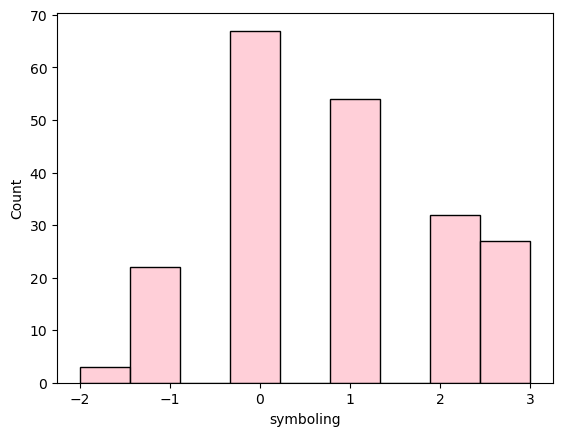

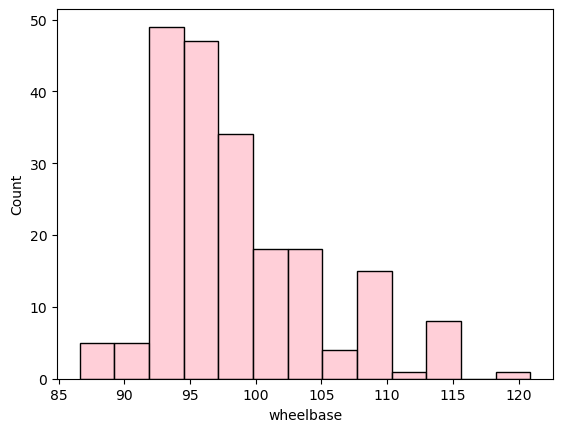

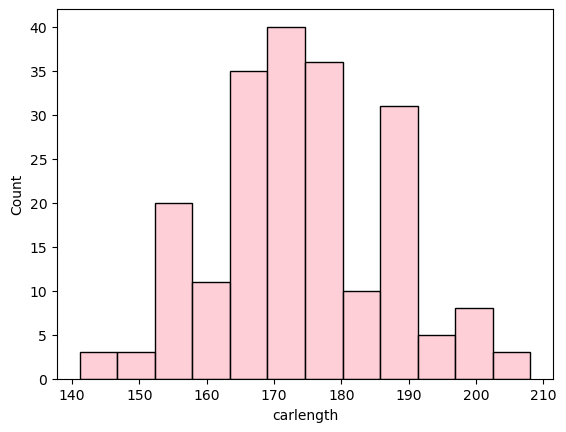

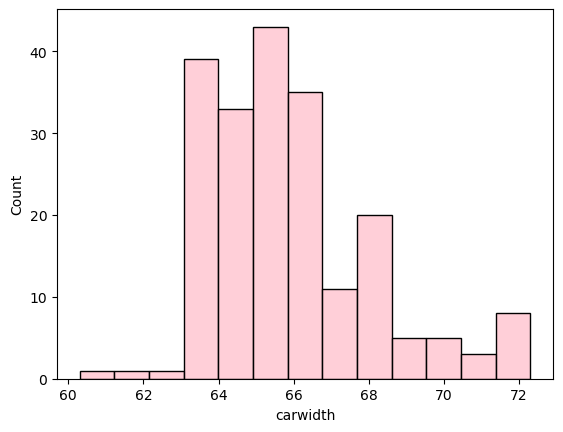

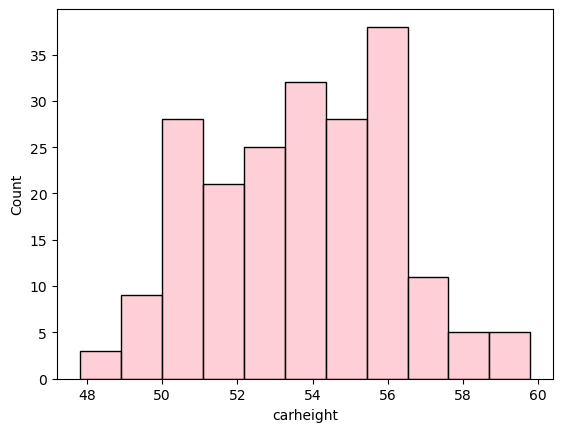

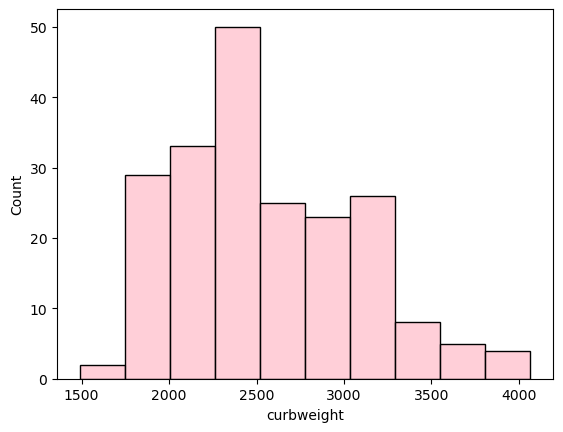

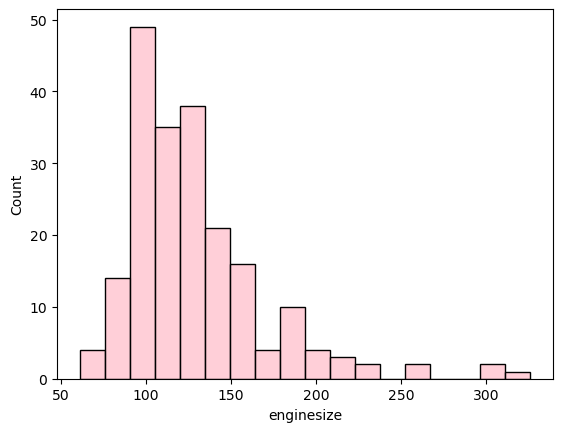

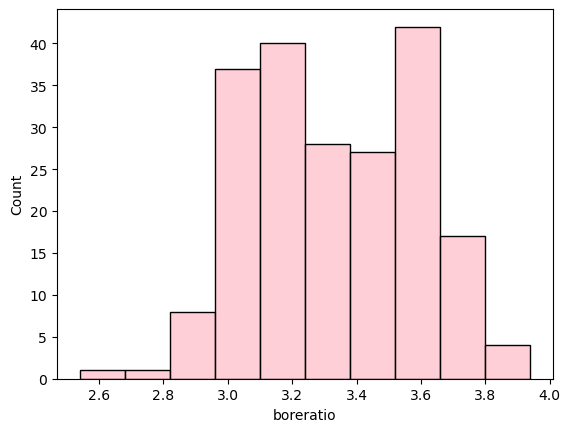

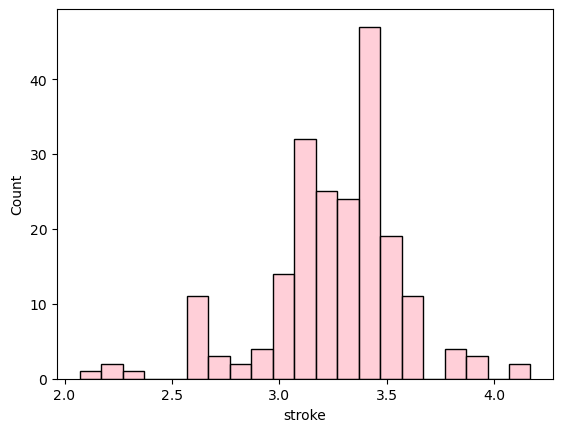

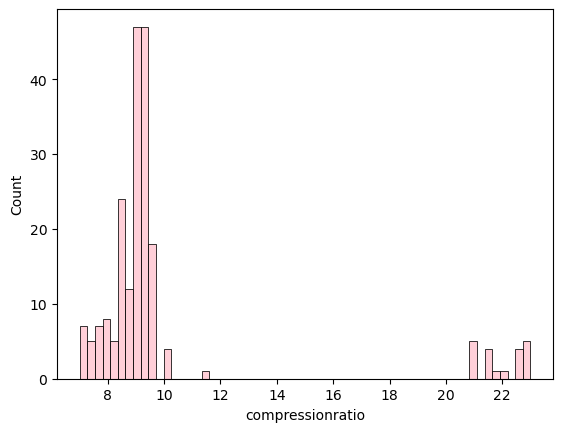

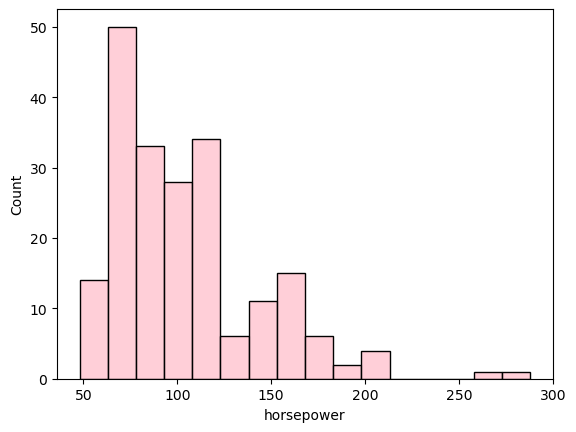

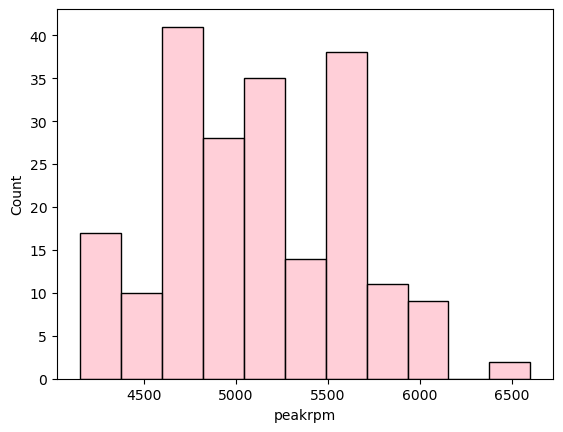

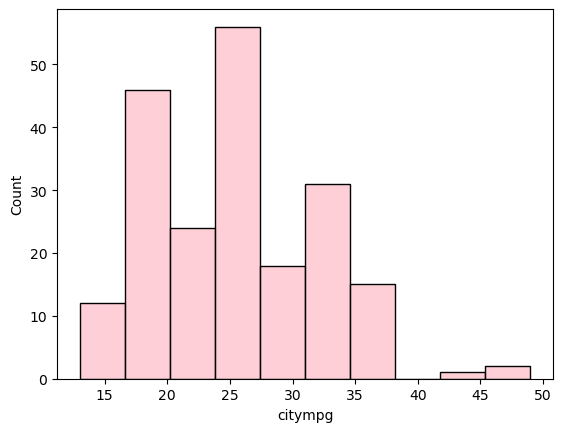

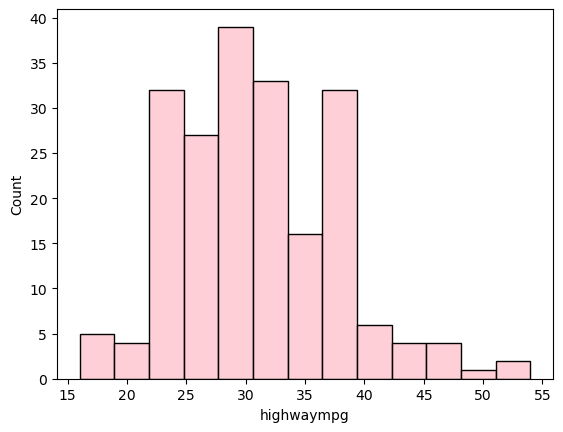

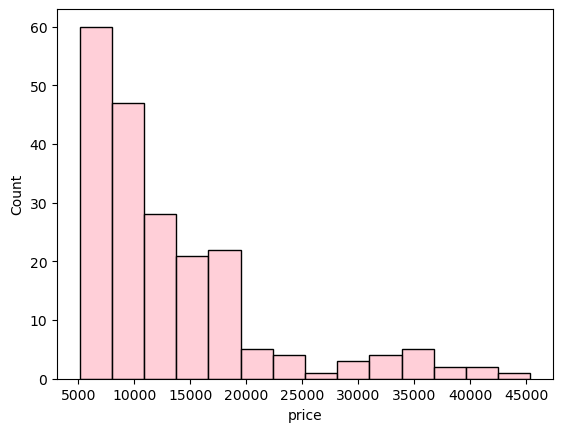

In [12]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.histplot(x=data[i], color="pink")
        plt.show()

for i in data.columns:
    if data[i].dtype != 'object':
        sns.kdeplot(x =data[i])
        plt.show()

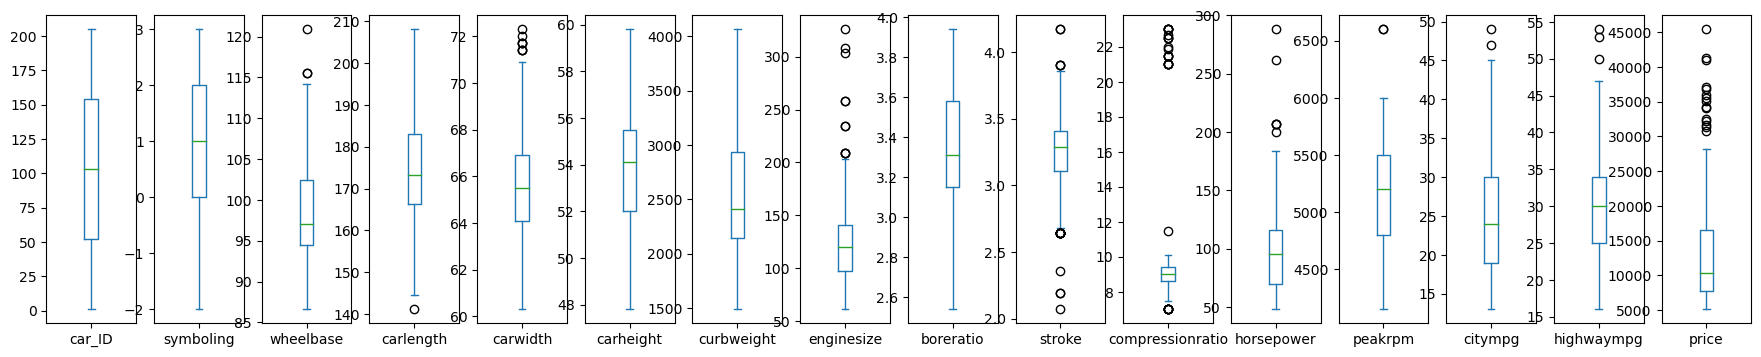

In [13]:
data.plot.box(figsize=(22,4), subplots = True);

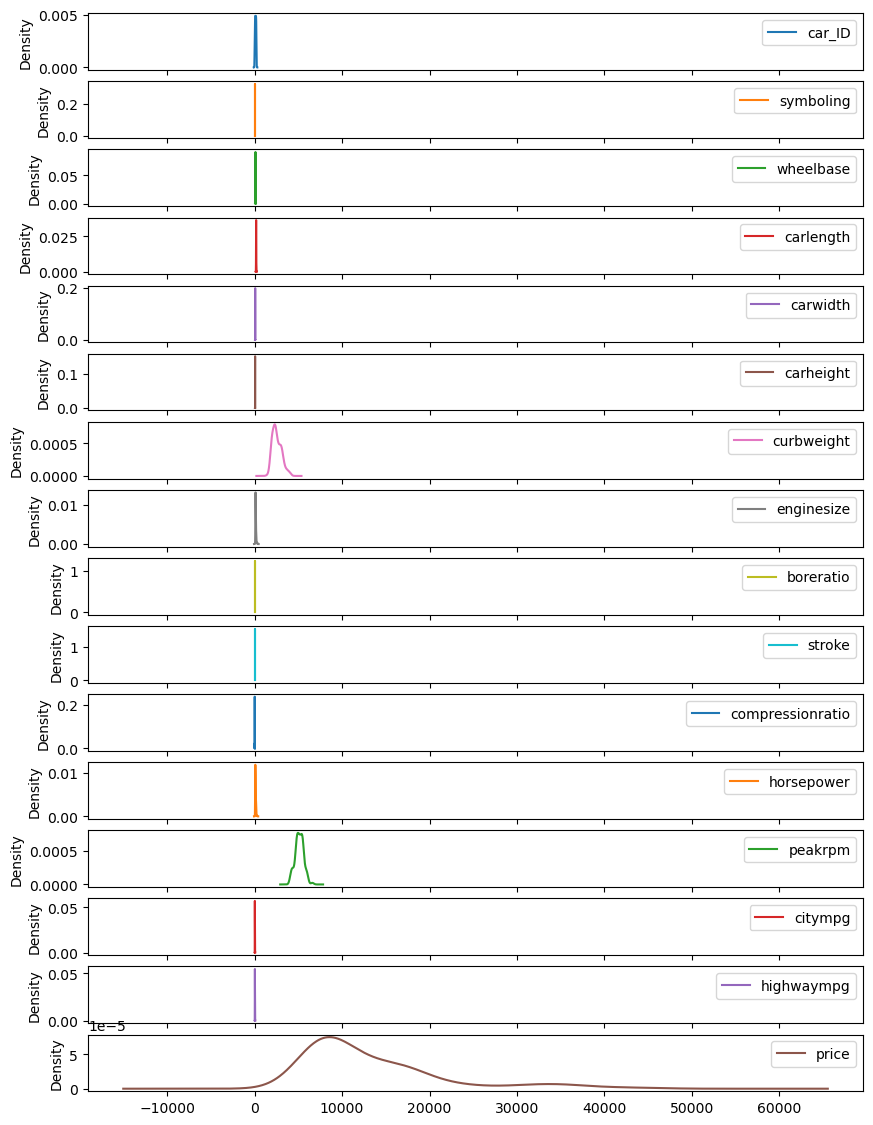

In [14]:
data.plot.kde(figsize=(10,14),subplots=True);

## <center><font color =brown>MULTIVARIATE ANALYSIS

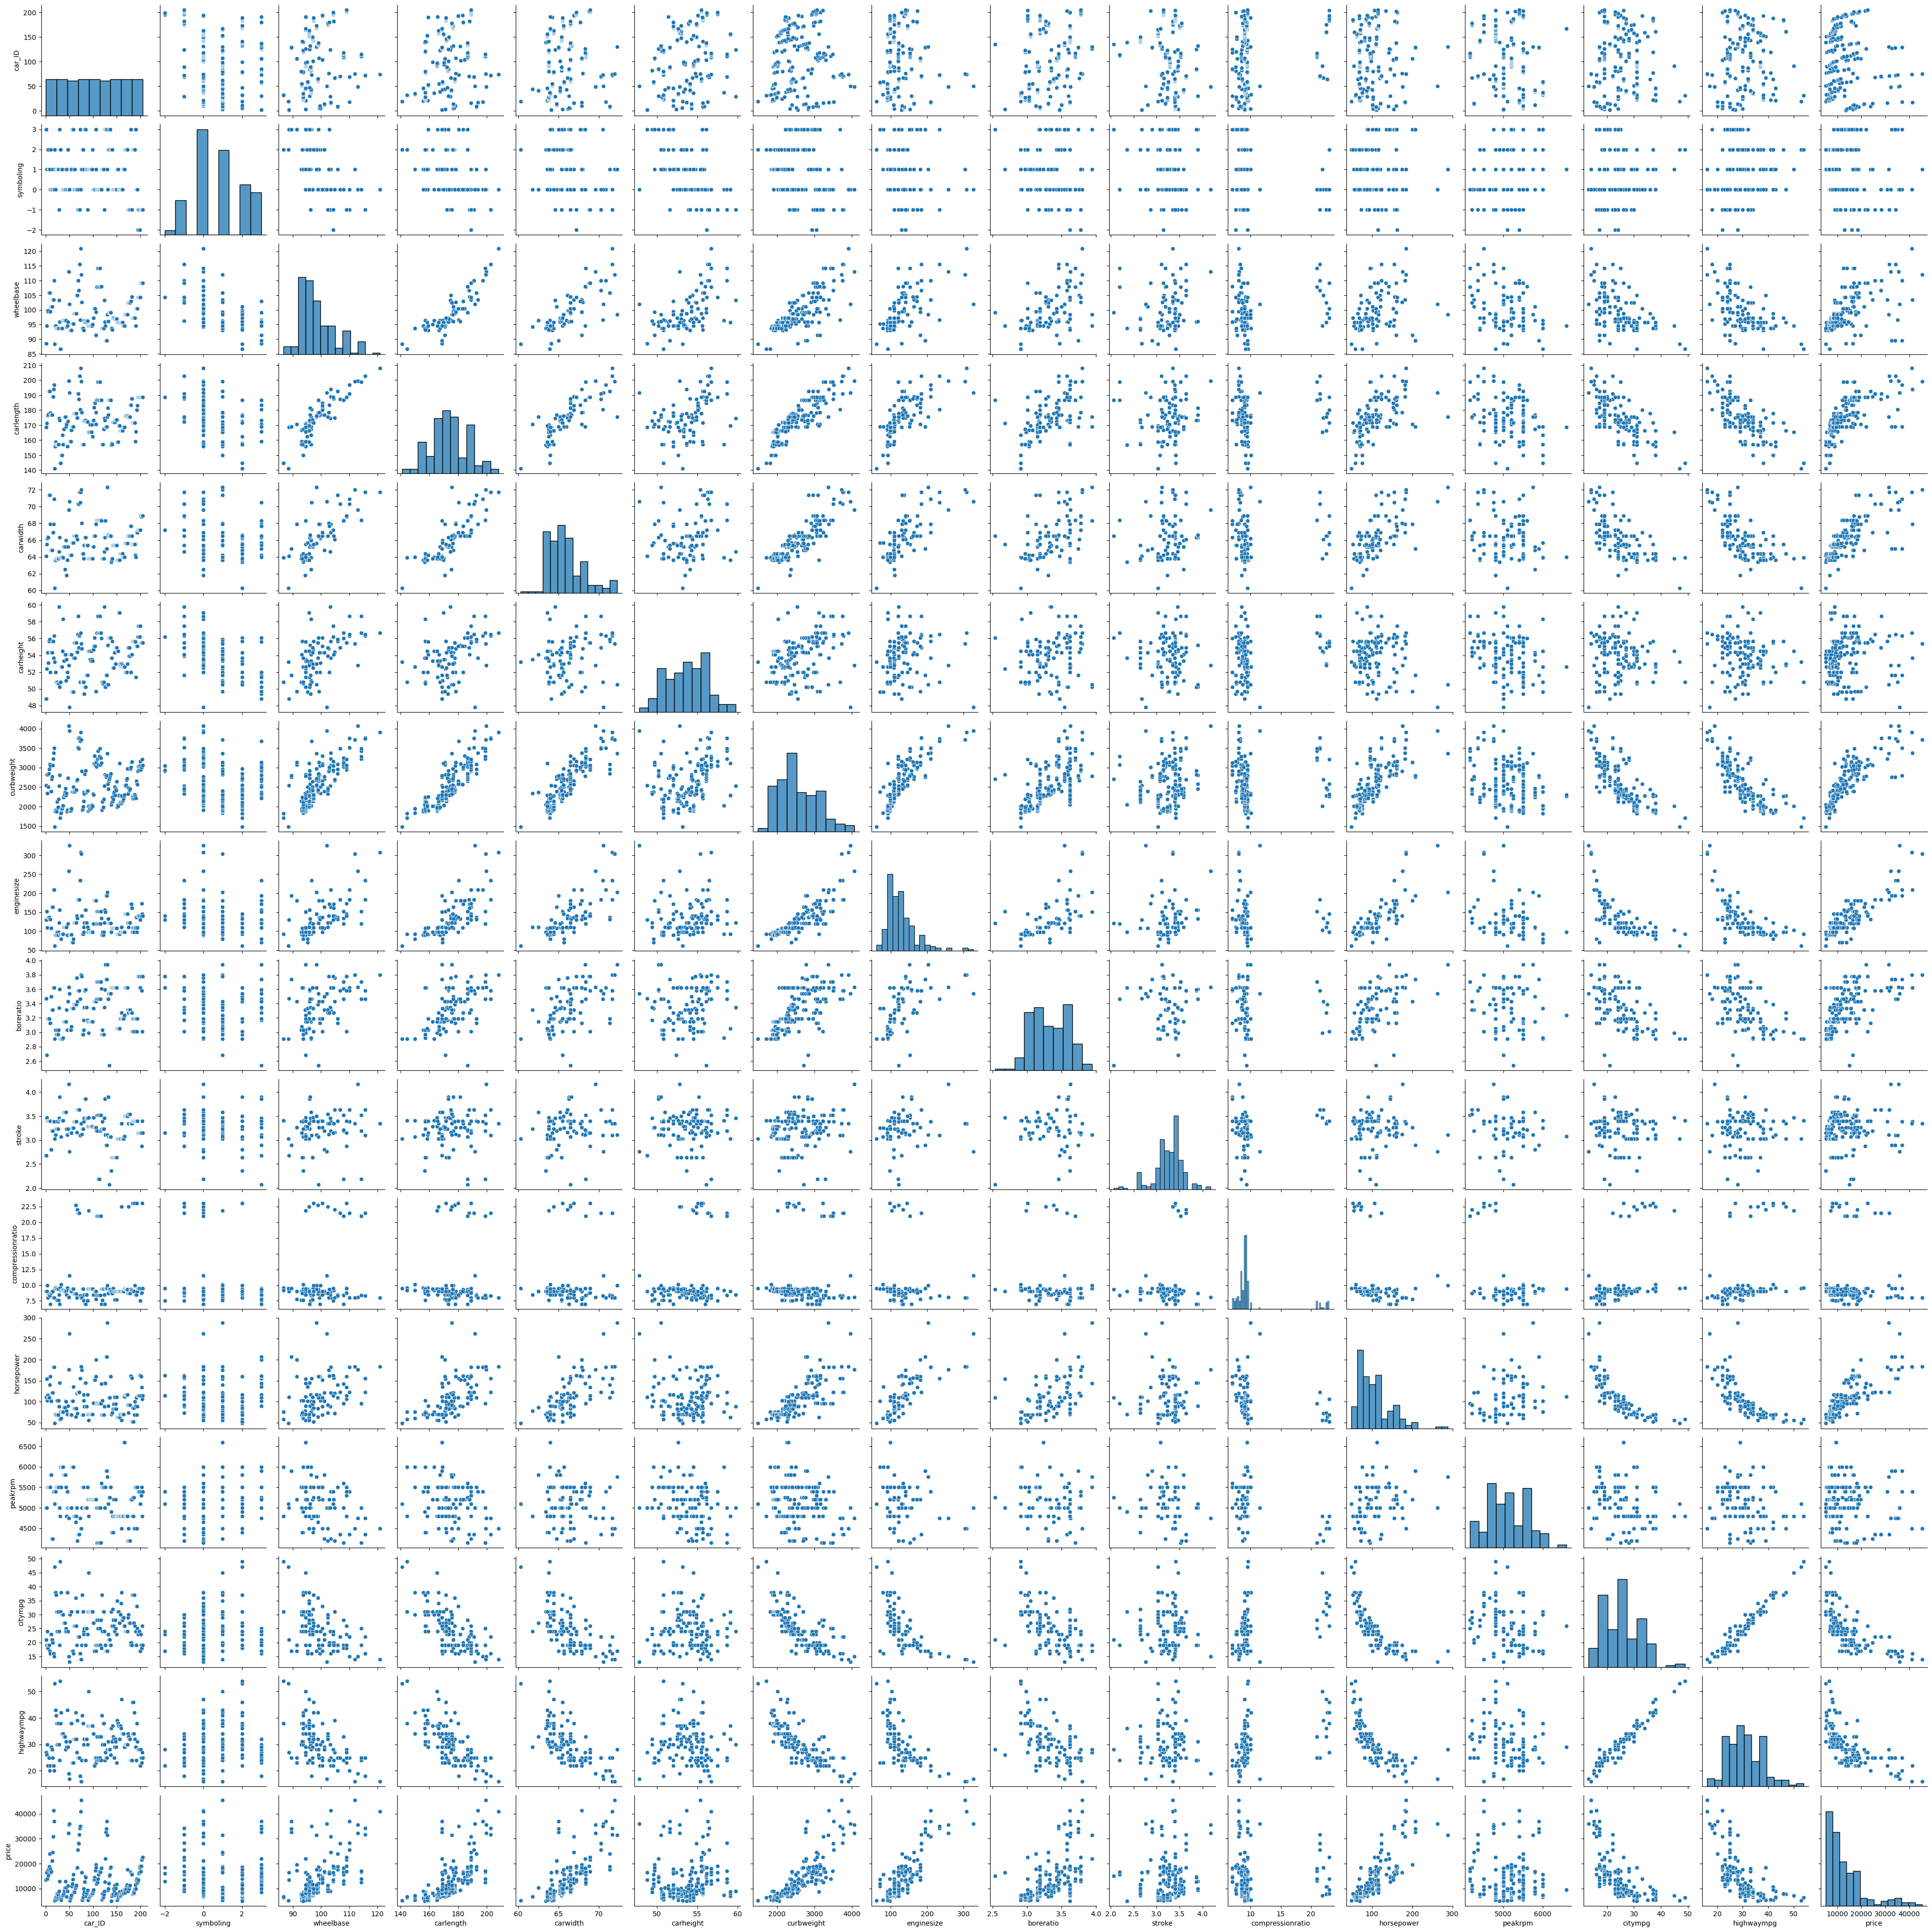

In [15]:
sns.pairplot(data=data)
plt.show()

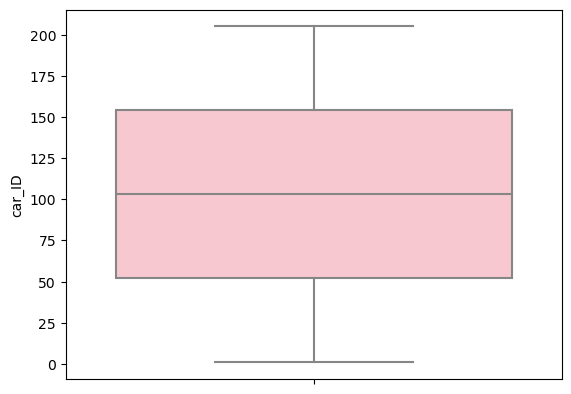

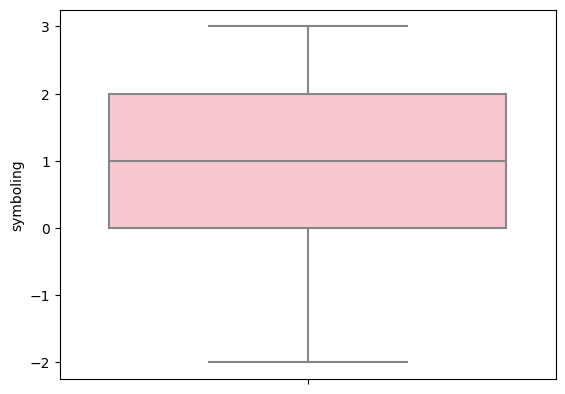

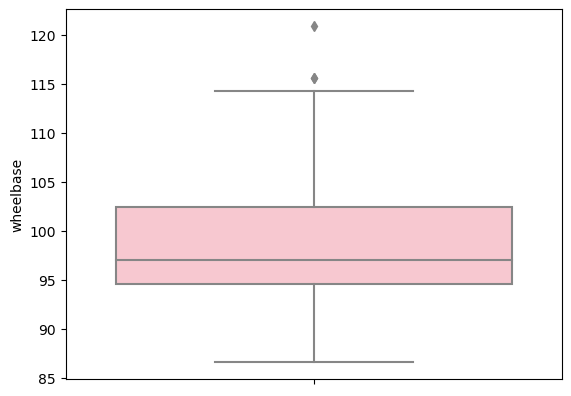

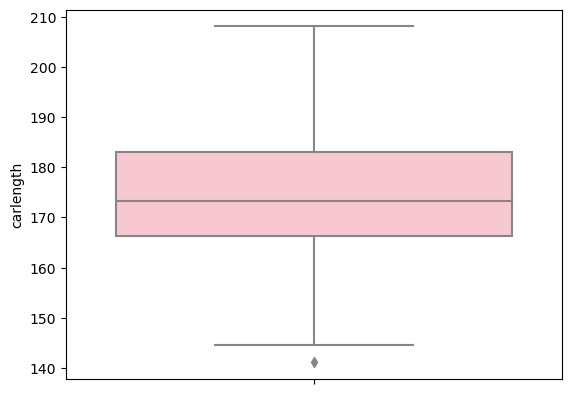

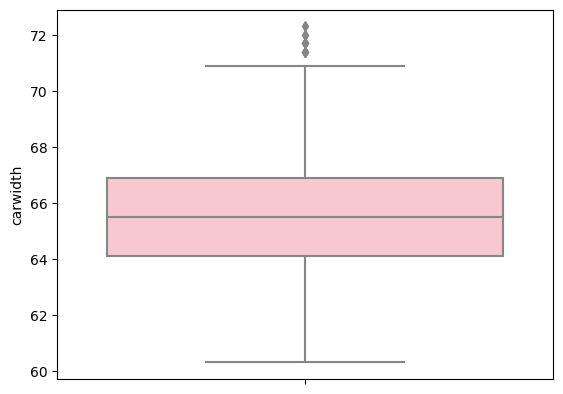

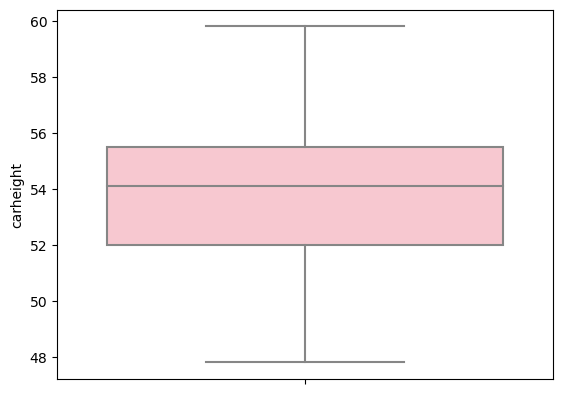

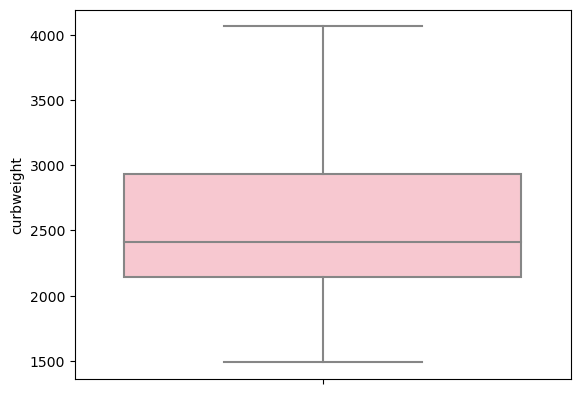

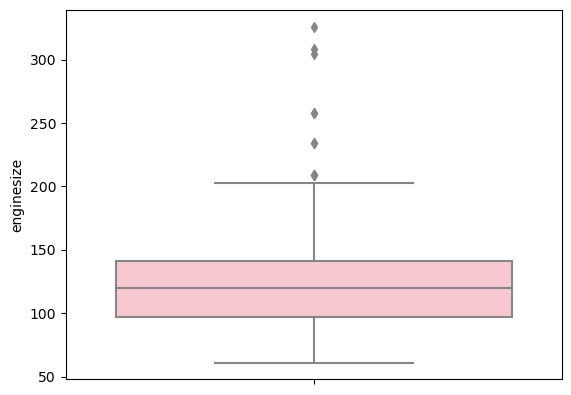

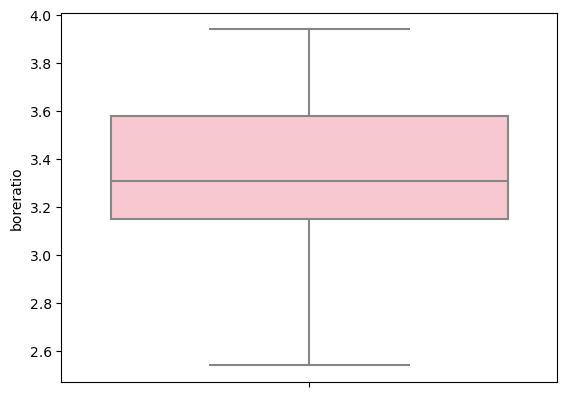

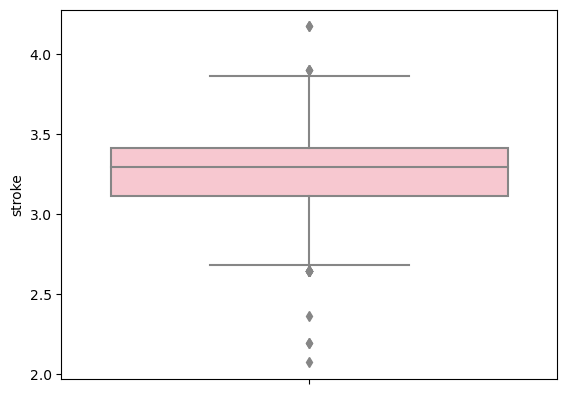

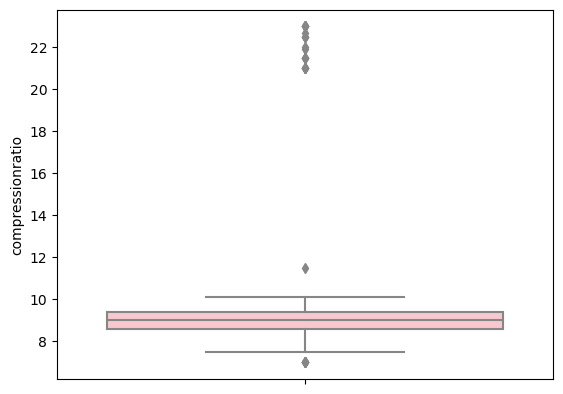

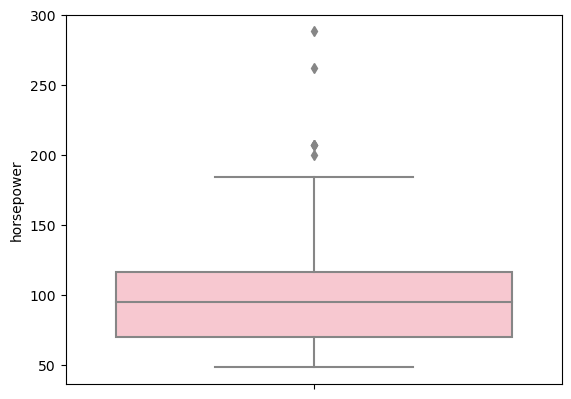

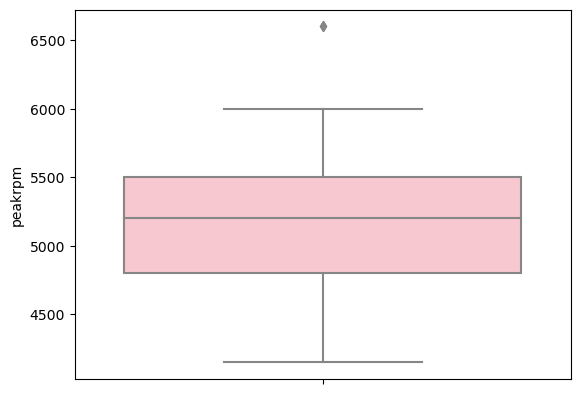

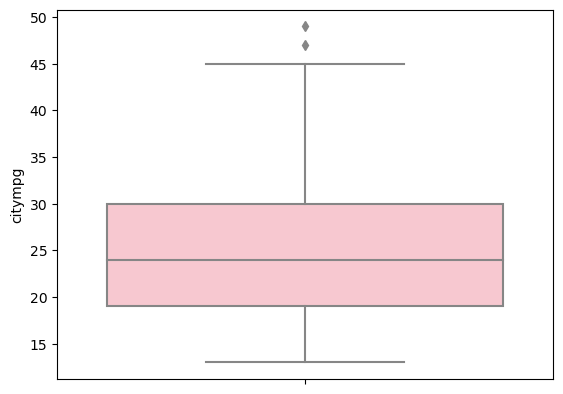

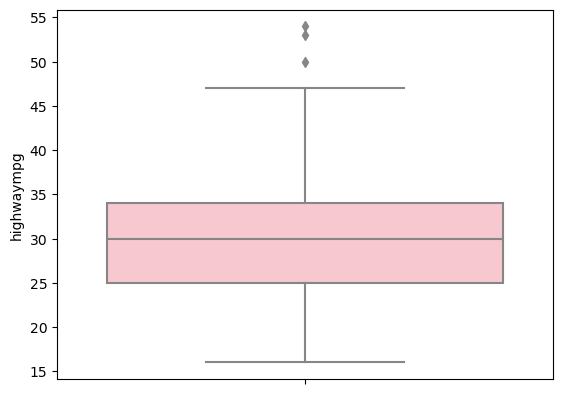

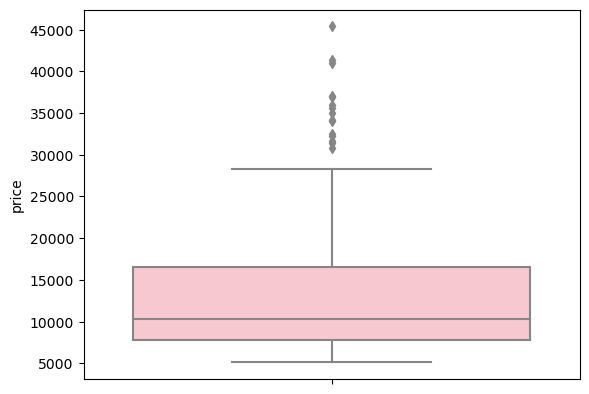

In [16]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y =data[i], color ="pink")
        plt.show()

 ## <CENTER><font color=brown>OUTLIER TREATMENT

In [17]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [18]:
for column in data.columns:
    if data[column].dtype != "object":
        UL, LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL) | (data[column]<LL),np.nan,data[column])

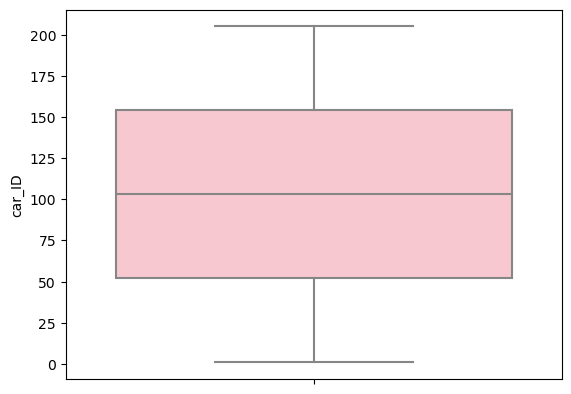

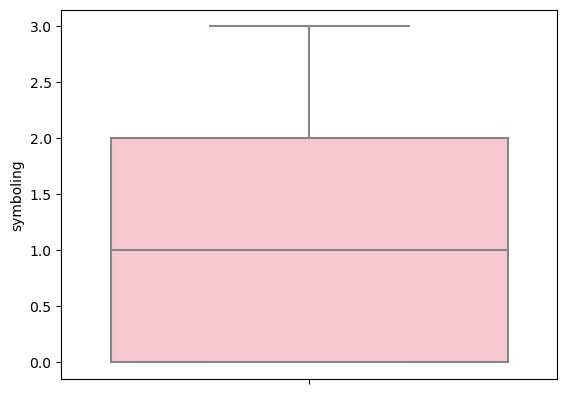

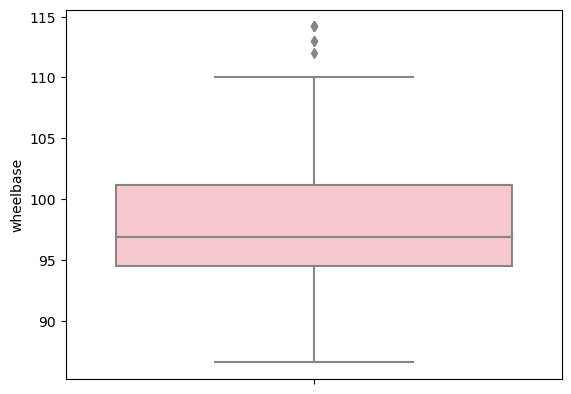

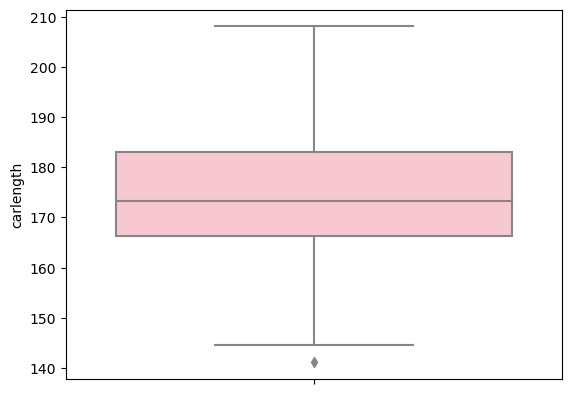

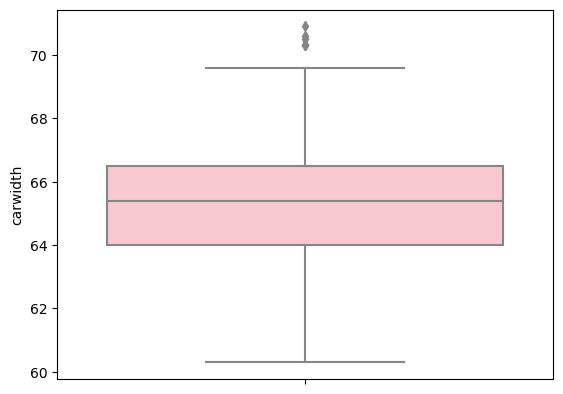

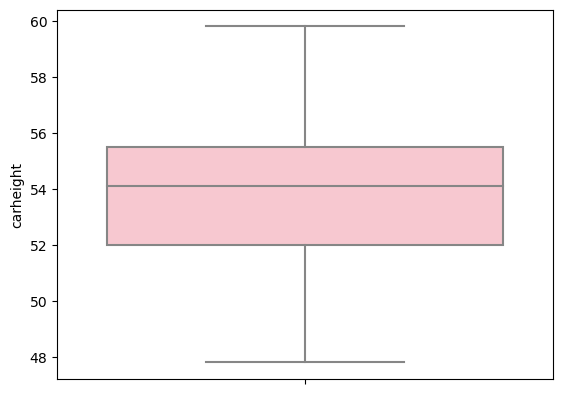

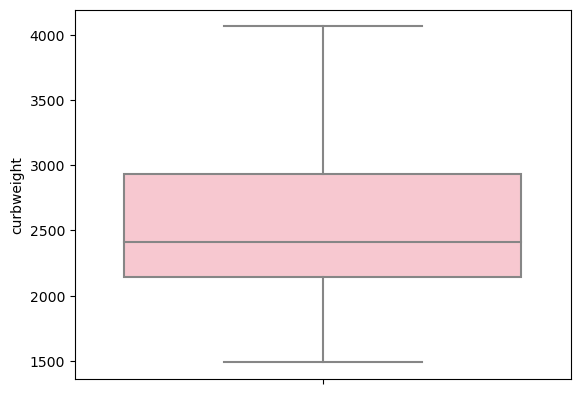

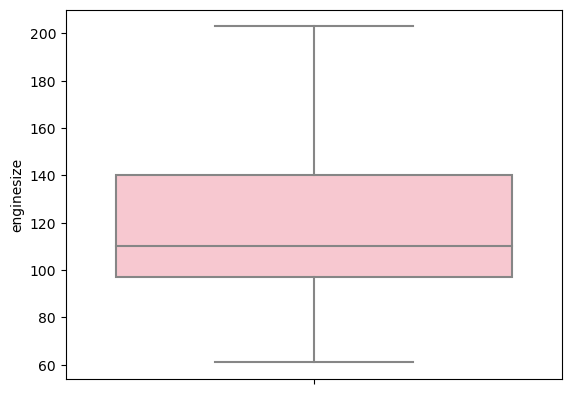

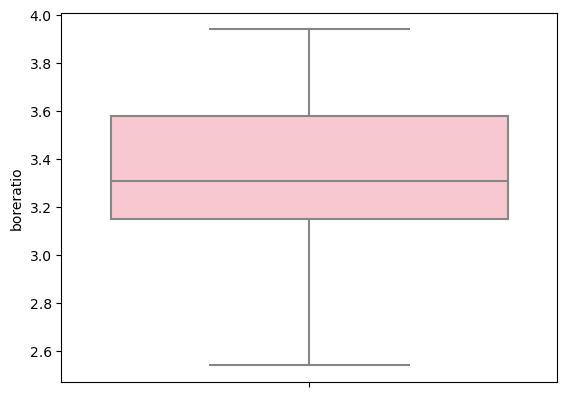

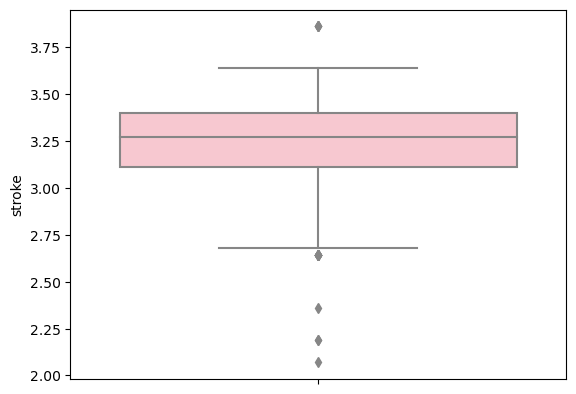

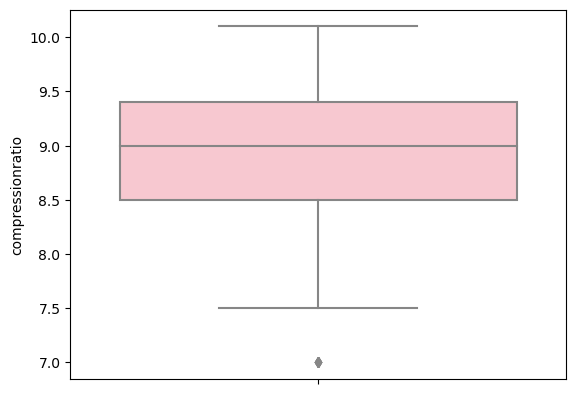

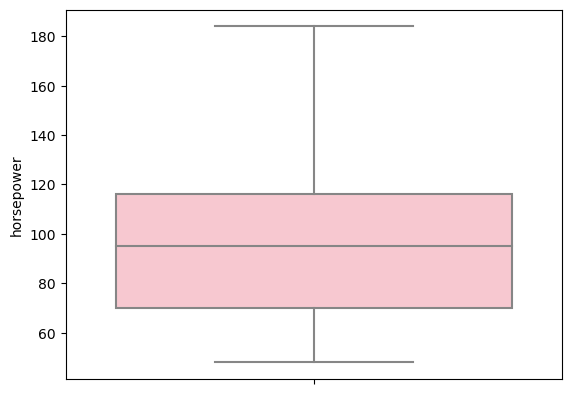

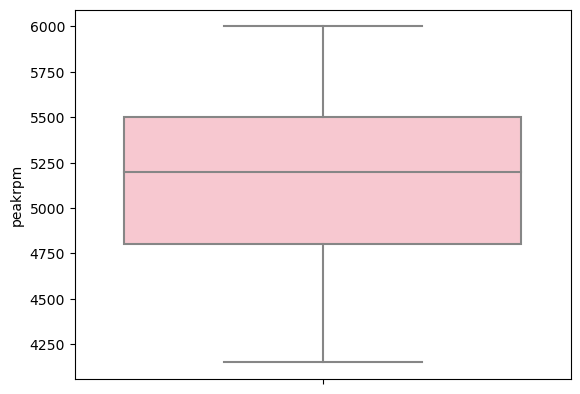

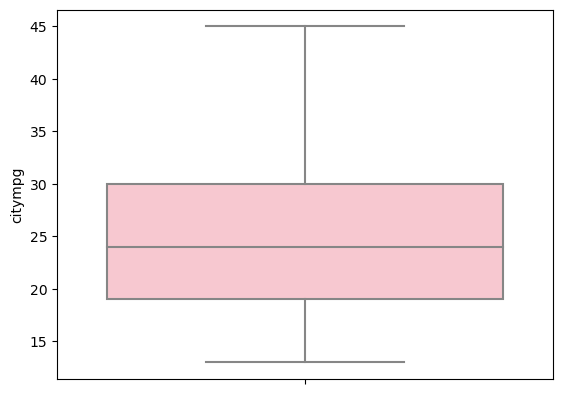

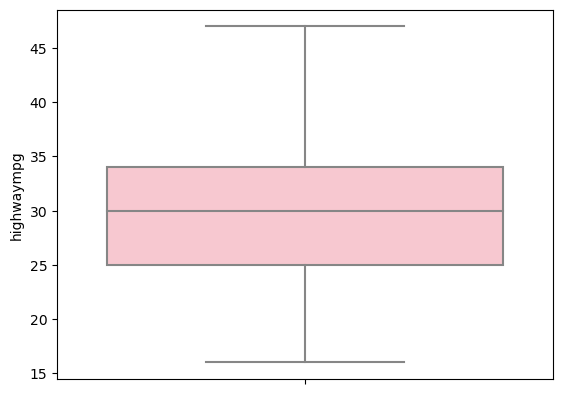

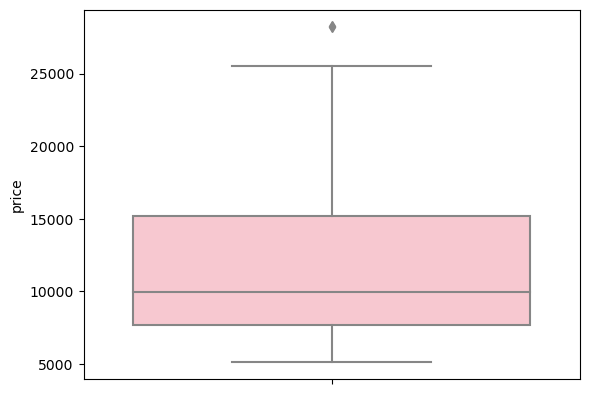

In [19]:
for i in data.columns:
    if data[i].dtype!= "object":
        sns.boxplot(y=data[i], color="pink")
        plt.show()

In [20]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [21]:
data.dropna(inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 193
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            141 non-null    float64
 1   symboling         141 non-null    float64
 2   CarName           141 non-null    object 
 3   fueltype          141 non-null    object 
 4   aspiration        141 non-null    object 
 5   doornumber        141 non-null    object 
 6   carbody           141 non-null    object 
 7   drivewheel        141 non-null    object 
 8   enginelocation    141 non-null    object 
 9   wheelbase         141 non-null    float64
 10  carlength         141 non-null    float64
 11  carwidth          141 non-null    float64
 12  carheight         141 non-null    float64
 13  curbweight        141 non-null    float64
 14  enginetype        141 non-null    object 
 15  cylindernumber    141 non-null    object 
 16  enginesize        141 non-null    float64
 1

### <font color=orange>CHECKING THE CORRELATION WITH TARGET VALUES

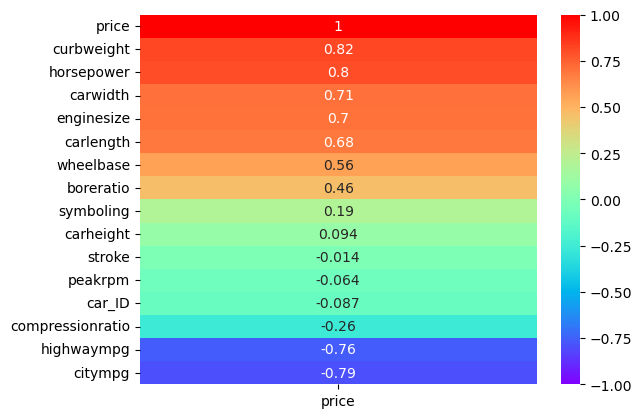

In [23]:
sns.heatmap(data.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1,annot=True, cmap="rainbow");

In [24]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,\
ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

### <FONT COLOR=ORANGE>  LETS TAKE ONLY THE COLUMNS THAT IS GOOD CORRELATION WITH TARGET

In [25]:
x = data[['boreratio', 'wheelbase', 'horsepower', 'carlength', 'enginesize','carwidth','curbweight']].values

In [26]:
y = data[['price']].values

### <FONT COLOR=ORANGE>FEATURE SCALING

In [27]:
sc = StandardScaler()

In [28]:
x = sc.fit_transform(x)

## <center><font color = brown>MODEL SELECTION

In [29]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor()
}

In [30]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  2298.189453276917
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  2295.976921378578
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  2286.3830892536084
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  2429.520114344671
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  2334.573628411373
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  2145.000620179331
***************************************************

In [31]:
ETR =ExtraTreesRegressor()

### <font color=orange>SPLITTING THE DATASET INTO TESTING AND TRAINING DATA

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [33]:
ETR.fit(x_train, y_train)

ExtraTreesRegressor()

### <font color=orange> MODEL ACCURACY

In [34]:
print("model trained with {}".format(ETR))
training_score = ETR.score(x_train, y_train)*100
testing_score = ETR.score(x_test, y_test)*100
score = r2_score(y_test, ETR.predict(x_test))*100
mae = mean_absolute_error(y_test, ETR.predict(x_test))
mse = mean_squared_error(y_test, ETR.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with ExtraTreesRegressor()
r2score:  84.67030039181999
training_score:  99.41422995004518
testing_score:  84.67030039181999
mae:  1146.2064937931032
mse:  2558327.6988147586
rmse_test:  1599.477320506533


In [35]:
y_pred = ETR.predict(x)

In [36]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT.head()

ACTUAL    PREDICTED
0  13495.0  14997.50000
1  16500.0  14997.50000
2  16500.0  15208.81335
3  13950.0  13950.00000
4  17450.0  17450.00000

### <font color=ORANGE>WE CAN SEE THAT PREDICTION IS CLOSER TO ACTUAL VALUE

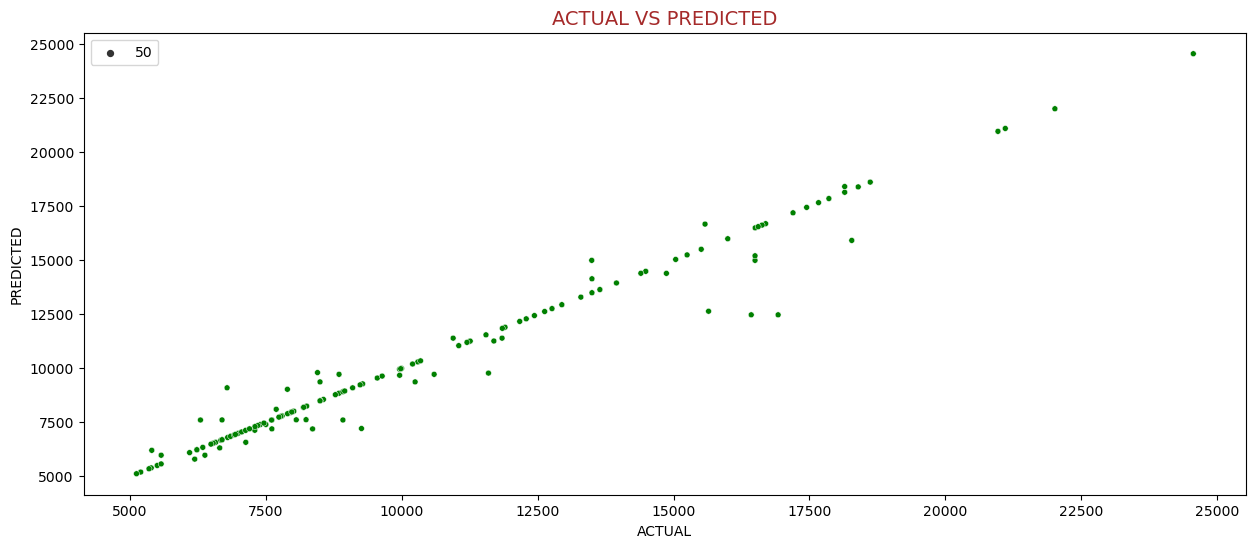

In [37]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='ACTUAL', y='PREDICTED', data=OUTPUT , size =50 ,color = "GREEN")
plt.title("ACTUAL VS PREDICTED" , size=14, color ="brown" )
plt.show()

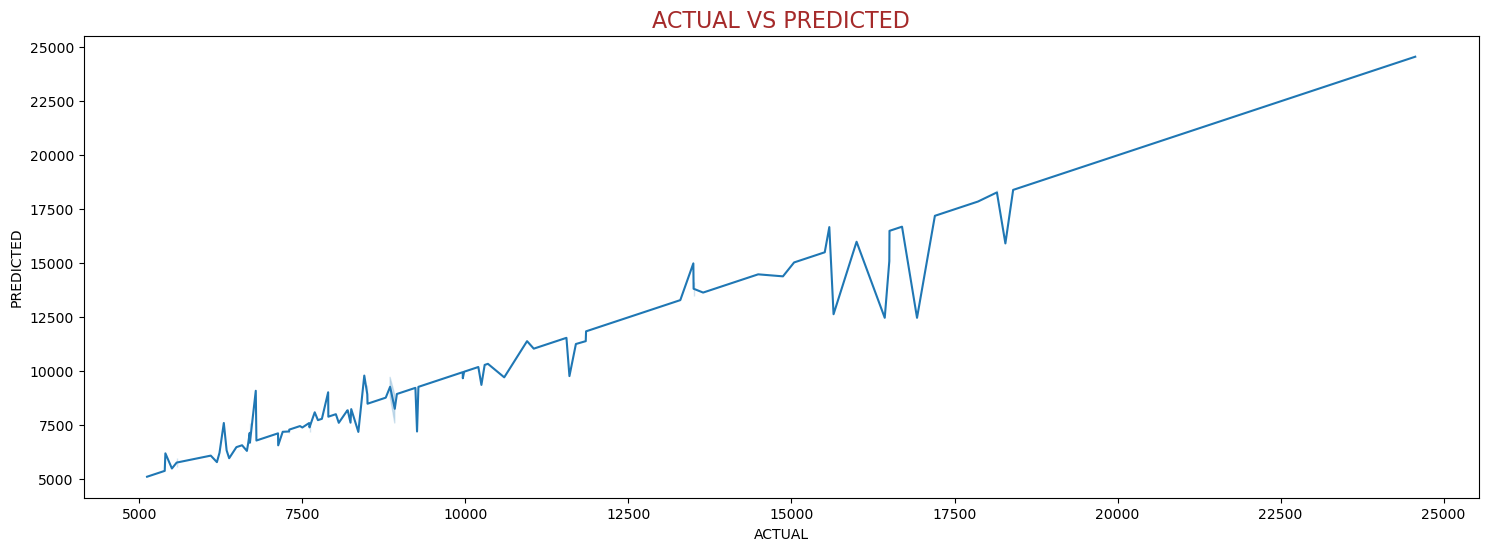

In [38]:
plt.figure(figsize=(18,6))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTED",color="brown",size=16)
plt.show()